# Benchmark xóa dấu

cài thêm 2 package sử dụng thuật toán Aho-Corasick

In [ ]:
%pip install -q cyac fsed

In [1]:
import re, random
from timeit import timeit
from matplotlib import pyplot as plt

from fsed.ahocorasick import AhoCorasickTrie as fsedTrie
from cyac import Trie as cyacTrie

mặc định văn bản dưới dạng unicode chuẩn C (unicode normal form C) để tránh rắc rối với các kí tự dấu

In [2]:
CHU_CO_DAU = "ÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬĐÈÉẺẼẸÊẾỀỂỄỆÍÌỈĨỊÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢÚÙỦŨỤƯỨỪỬỮỰÝỲỶỸỴáàảãạăắằẳẵặâấầẩẫậđèéẻẽẹêếềểễệíìỉĩịóòỏõọôốồổỗộơớờởỡợúùủũụưứừửữựýỳỷỹỵ"
CHU_KO_DAU = "A"*17 + "D" + "E"*11 + "I"*5 + "O"*17 + "U"*11 + "Y"*5 + "a"*17 + "d" + "e"*11 + "i"*5 + "o"*17 + "u"*11 + "y"*5
assert(len(CHU_CO_DAU) == len(CHU_KO_DAU))

№ 0: `str.maketrans() + .translate()`

In [3]:
BANG_XOA_DAU_0 = str.maketrans(CHU_CO_DAU, CHU_KO_DAU)

def xoa_dau_0(txt):
    return txt.translate(BANG_XOA_DAU_0)

№ 1: `new string`

In [4]:
BANG_XOA_DAU_1 = dict(zip(CHU_CO_DAU, CHU_KO_DAU))

def xoa_dau_1(txt):
    return "".join(BANG_XOA_DAU_1.get(s, s) for s in txt)

№ 2: `.replace()`

In [5]:
BANG_XOA_DAU_2 = dict(zip(CHU_CO_DAU, CHU_KO_DAU))

def xoa_dau_2(txt):
    for k, v in BANG_XOA_DAU_2.items():
        txt = txt.replace(k, v)
    return txt

№ 3: `RegEx`

In [6]:
BANG_XOA_DAU_3 = {
    "A": re.compile("[ÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬ]"),
    "D": re.compile("Đ"),
    "E": re.compile("[ÈÉẺẼẸÊẾỀỂỄỆ]"),
    "I": re.compile("[ÍÌỈĨỊ]"),
    "O": re.compile("[ÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢ]"),
    "U": re.compile("[ÚÙỦŨỤƯỨỪỬỮỰ]"),
    "Y": re.compile("[ÝỲỶỸỴ]"),
    "a": re.compile("[áàảãạăắằẳẵặâấầẩẫậ]"),
    "d": re.compile("đ"),
    "e": re.compile("[èéẻẽẹêếềểễệ]"),
    "i": re.compile("[íìỉĩị]"),
    "o": re.compile("[óòỏõọôốồổỗộơớờởỡợ]"),
    "u": re.compile("[úùủũụưứừửữự]"),
    "y": re.compile("[ýỳỷỹỵ]")
}

def xoa_dau_3(txt):
    for k, v in BANG_XOA_DAU_3.items():
        txt = v.sub(k, txt)
    return txt

№ 4: `fsed`

In [ ]:
BANG_XOA_DAU_4 = fsedTrie()
for i, j in zip(CHU_CO_DAU, CHU_KO_DAU):
    BANG_XOA_DAU_4[i] = j

def xoa_dau_4(txt):
    return BANG_XOA_DAU_4.greedy_replace(txt)

№ 5: `cyac`

In [ ]:
BANG_XOA_DAU_5 = cyacTrie()
BANG_XOA_DAU_5bis = {BANG_XOA_DAU_5.insert(i): j for i, j in zip(CHU_CO_DAU, CHU_KO_DAU)}

def xoa_dau_5(txt):
    return BANG_XOA_DAU_5.replace_longest(txt, BANG_XOA_DAU_5bis)

array chứa thời gian thực thi từng phương pháp để so sánh

In [7]:
vec_N, vec_0, vec_1, vec_2, vec_3, vec_4, vec_5 = [], [], [], [], [], [], []

benchmark với văn bản có độ dài 10<sup>0</sup>, 10<sup>1</sup>, 10<sup>2</sup>, …, 10<sup>8</sup> kí tự, với tất cả kí tự đều có dấu (worst-case scenario)

In [8]:
N_repet = 10 # sồ lần thực thi (lấy thời gian trung bình)
for i in range(9):
    N = 10**i
    txt = "".join(random.choices(CHU_CO_DAU, k=N))

    t_0 = timeit("xoa_dau_0(txt)", number=N_repet, globals=globals())
    t_1 = timeit("xoa_dau_1(txt)", number=N_repet, globals=globals())
    t_2 = timeit("xoa_dau_2(txt)", number=N_repet, globals=globals())
    t_3 = timeit("xoa_dau_3(txt)", number=N_repet, globals=globals())
    t_4 = timeit("xoa_dau_4(txt)", number=N_repet, globals=globals())
    t_5 = timeit("xoa_dau_5(txt)", number=N_repet, globals=globals())

    vec_N.append(N)
    vec_0.append(t_0)
    vec_1.append(t_1)
    vec_2.append(t_2)
    vec_3.append(t_3)
    vec_4.append(t_4)
    vec_5.append(t_5)

đồ thị so sánh

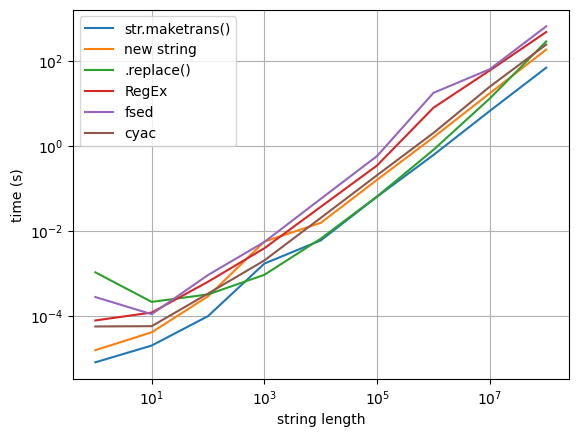

In [9]:
plt.plot(vec_N, vec_0, label="str.maketrans()")
plt.plot(vec_N, vec_1, label="new string")
plt.plot(vec_N, vec_2, label=".replace()")
plt.plot(vec_N, vec_3, label="RegEx")
plt.plot(vec_N, vec_4, label="fsed")
plt.plot(vec_N, vec_5, label="cyac")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("string length")
plt.ylabel("time (s)")
plt.legend()
plt.grid()
plt.show()